<a href="https://colab.research.google.com/github/pkanyu/Colab-Notebooks/blob/main/ComputerVisionCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# CNN: Type of ANN used in image and video recognision application
# It has a mechanism to identify pattern/features in an image or video

# Applications: image classification, face recognition, medical image analysis, autonomous vehicles

In [ ]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from keras import backend
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from keras import datasets, layers, models

In [ ]:
# Step 1:
# Prepare the Training and Testing Images
# Load Preprocessed Images from Keras
(training_images, training_labels),(testing_images, testing_labels) = tf.keras.datasets.cifar10.load_data()

In [ ]:
# Convert the images into pixels
# 16 x 16 pixels
# 256
# 0 - 255

training_images, testing_images = training_images/255, testing_images/255

In [ ]:
# Determine the Labels
# Classification

class_names = ['Plane','Car', 'Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

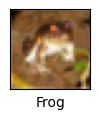

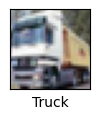

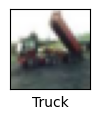

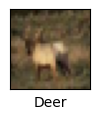

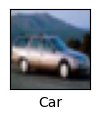

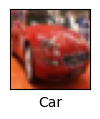

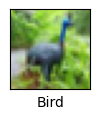

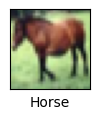

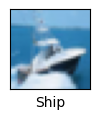

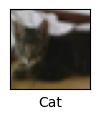

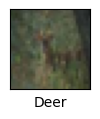

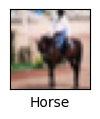

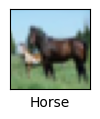

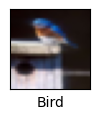

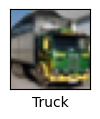

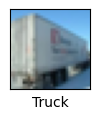

In [ ]:
# Visualize the first 16 training images in cifar10 dataset
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(training_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[training_labels[i][0]])

  plt.show()

In [ ]:
# Loading the Training and Testing Images and Labels
training_images = training_images[:20000]
training_labels = training_labels[:20000]

testing_images = training_images[:40000]
testing_labels = training_labels[:40000]

In [ ]:
# Design CNN
# Sequencial, Feature Maps, filter_size, activation, MaxPooling
# Sequential: It arranges the inputs of a Con2D
# 16 X 16 pixels
# 256 nodes in sequence to represent all the pixels

model = models.Sequential()

In [ ]:

# Add the Hidden Layers
# Input Layers
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (32,32, 3)))
model.add(layers.MaxPool2D((2,2)))


In [ ]:
# More Hidden Layers
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

In [ ]:
# Flattening Layer
# 32 x 32
# 1024 neurons(node) in a single layer
model.add(layers.Flatten())

In [ ]:
# Apply Artificial Neural Network
# Read On Assignment
# MaxPooling
# How to Generate Feature Maps in CNN
# Filter Size
# Flattening/ Fully Connected Layer

In [ ]:
model.add(layers.Dense(64, activation = 'relu'))

# Output Layer
model.add(layers.Dense(10, activation = 'softmax'))


In [ ]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Training...
model.fit(training_images,training_labels,epochs=10)

Epoch 1/10
625/625 [==============================] - 28s 43ms/step - loss: 1.7065 - accuracy: 0.3728
Epoch 2/10
625/625 [==============================] - 27s 43ms/step - loss: 1.3585 - accuracy: 0.5082
Epoch 3/10
625/625 [==============================] - 25s 40ms/step - loss: 1.1940 - accuracy: 0.5749
Epoch 4/10
625/625 [==============================] - 28s 45ms/step - loss: 1.0887 - accuracy: 0.6172
Epoch 5/10
625/625 [==============================] - 27s 43ms/step - loss: 0.9993 - accuracy: 0.6460
Epoch 6/10
625/625 [==============================] - 26s 42ms/step - loss: 0.9209 - accuracy: 0.6773
Epoch 7/10
625/625 [==============================] - 25s 40ms/step - loss: 0.8574 - accuracy: 0.6993
Epoch 8/10
625/625 [==============================] - 26s 42ms/step - loss: 0.7849 - accuracy: 0.7221
Epoch 9/10
625/625 [==============================] - 26s 42ms/step - loss: 0.7317 - accuracy: 0.7448
Epoch 10/10
625/625 [==============================] - 25s 40ms/step - loss: 0.678

In [ ]:
# Evaluating the Model Accuracy
loss, accuracy = model.evaluate(testing_images,testing_labels)
print(f"loss is {loss}")
print(f"Accuracy is {accuracy}")

625/625 [==============================] - 7s 12ms/step - loss: 0.5970 - accuracy: 0.7915
loss is 0.5970028638839722
Accuracy is 0.7915499806404114


In [ ]:
model.save('image_classifier.models')


In [ ]:
# Model Prediction
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


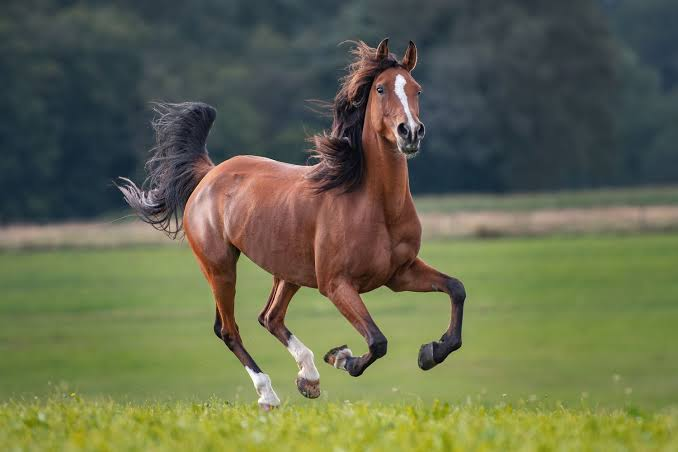

In [ ]:
# Display the testing images

import glob
from IPython.display import Image, display
for image in glob.glob("/content/drive/MyDrive/tested_horse.jpeg"):
           display(Image(filename= image))


In [ ]:
# Load the Saved model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

In [ ]:
# Load Image
image_path = '/content/drive/MyDrive/tested_ship.png'
image = load_img(image_path,target_size=(32,32,3))

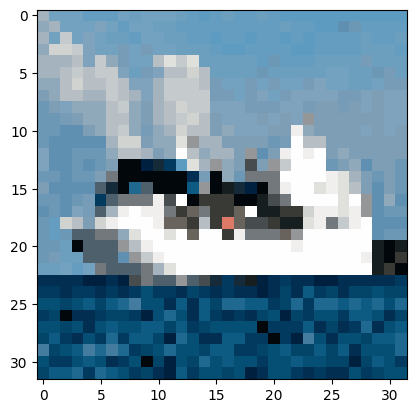

In [ ]:
# Convert the Image to Array(Tensors)
converted_image = img_to_array(image)
converted_image_pixels = converted_image/255
converted_image_pixels = converted_image_pixels.reshape(32,32,3)

plt.imshow(converted_image_pixels,cmap=plt.cm.binary)


In [ ]:
# Prediction
import numpy as np
prediction = model.predict(np.array([converted_image_pixels]))
print(prediction)

1/1 [==============================] - 0s 26ms/step
[[4.5673089e-04 1.4227265e-06 3.9332555e-08 6.4950143e-09 1.2849229e-08
  2.3195213e-08 4.6318584e-11 6.2379962e-11 9.9954140e-01 3.0944003e-07]]


In [ ]:
index = np.argmax(prediction)
print(f"The model predicted {class_names[index]}")

The model predicted Ship
